# Inaugural Project

Imports and set magics:

In [2]:
import numpy as np

from types import SimpleNamespace
from scipy import optimize
from scipy.optimize import minimize
import pandas as pd 
import matplotlib.pyplot as plt
import math

# autoreload modules when code is run. Otherwise, python will not see recent changes. 
%load_ext autoreload
%autoreload 2

# Import your own code
import inauguralproject

from inauguralproject import HouseholdClass 

# Question 1

**Explain how you solve the model**

We have changed the definition of consumption of home goods in line 58-65 in inauguralproject.py, to allow for $\sigma\neq1$

Following this, we solve the model discretely, and find the intial optimal working hours for men and women, in the the market and at home.

In [3]:
model = HouseholdClass()
initial = model.solve_discrete()
print(initial)

/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:72: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


namespace(LM=4.5, HM=4.5, LF=4.5, HF=4.5)


In the following, we describe how optimal hours in the market and in the home changes dependent on different values of $\sigma$ and $\alpha$. We also report the relative relationsship between hours worked at home for men and women.

In [29]:
par = model.par

alpha_vec = [0.25,0.5,0.75]
sigma_vec = [0.5,1,1.5]

loop=[]
for i in sigma_vec:
    par.sigma = i
    for j in alpha_vec:
        par.alpha = j
        opt = model.solve_discrete()

        fraction = opt.HF/opt.HM
        loop.append(fraction)
        print(f' if sigma = {par.sigma:.2f} and alpha = {par.alpha:.2f}     H_F / H_M is {fraction:.2f}')


print(loop)

/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:67: RuntimeWarning: divide by zero encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))
/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:67: RuntimeWarning: invalid value encountered in reciprocal
  H = ((1-par.alpha) * HM**((par.sigma-1)/par.sigma) + par.alpha * HF**((par.sigma-1)/par.sigma))**(par.sigma/(par.sigma-1))


 if sigma = 0.50 and alpha = 0.25     H_F / H_M is 0.55
 if sigma = 0.50 and alpha = 0.50     H_F / H_M is 1.00
 if sigma = 0.50 and alpha = 0.75     H_F / H_M is 1.83
 if sigma = 1.00 and alpha = 0.25     H_F / H_M is 0.31
 if sigma = 1.00 and alpha = 0.50     H_F / H_M is 1.00
 if sigma = 1.00 and alpha = 0.75     H_F / H_M is 3.25
 if sigma = 1.50 and alpha = 0.25     H_F / H_M is 0.21
 if sigma = 1.50 and alpha = 0.50     H_F / H_M is 1.00
 if sigma = 1.50 and alpha = 0.75     H_F / H_M is 4.67
[0.5454545454545454, 1.0, 1.8333333333333333, 0.3076923076923077, 1.0, 3.25, 0.21428571428571427, 1.0, 4.666666666666667]


____

In [42]:
def print_table(alpha_vec,sigma_vec): # brøken i opg 1
    
    # a. empty text
    text = ''
    
    # b. top header
    text += f'{"":3s}'
    for j, sigma in enumerate(sigma_vec):
       text += f'{j:6d}' 
    text += '\n' # line shift
    
    # c. body
    for i,alpha in enumerate(alpha_vec):
        if i > 0:
            text += '\n' # line shift
        text += f'{i:3d} ' # left header
        for j, sigma in enumerate(sigma_vec):
            text += f'{frac(alpha,sigma):6.3f}'
    
    # d. print
    print(text)

print_table(alpha_vec,sigma_vec)

NameError: name 'frac' is not defined

In [30]:
# evaluate utility function
alpha_grid,sigma_grid = np.meshgrid(alpha_vec,sigma_vec,indexing='ij')
frac_grid = frac(alpha_grid,sigma_grid)

# a. plot
fig = plt.figure()
ax = fig.add_subplot(1,1,1,projection='3d')
ax.plot_surface(alpha_grid,sigma_grid,frac_grid,cmap=cm.jet)

# b. add labels
ax.set_xlabel('$alpha$')
ax.set_ylabel('$sigma$')
ax.set_zlabel('$frac,HF/HM$')

# c. invert xaxis
ax.invert_xaxis()

NameError: name 'frac' is not defined

# Question 2

Explain your code and procedure

In [33]:
model2 = HouseholdClass()

par = model2.par

log_rel_hours_list=[]
#log_rel_wage_list=[]

for wage in par.wF_vec:
    par.wF = wage
    opt = model2.solve_discrete()    

    rel_hours = opt.HF/opt.HM
    log_rel_hours = np.log(rel_hours)

    log_rel_wage = np.log(par.wF_vec)

    log_rel_hours_list = np.append(log_rel_hours_list, log_rel_hours)
    #log_rel_wage_list = np.append(log_rel_wage_list, log_rel_wage)   
    print(f'rel_hours = {rel_hours:.3f}     log_rel_hours = {log_rel_hours:.3f}     wF = {wage:.3f}   HF = {opt.HF:.3f}   HM = {opt.HM:.3f}   wM = {par.wM:.3f}')


print(log_rel_hours_list)

log_rel_wage_list=np.log(par.wF_vec/par.wM)
print(log_rel_wage_list)

/Users/idahougaard/OneDrive - Københavns Universitet/projects-2023-ida-simone-elin/inauguralproject/inauguralproject.py:71: RuntimeWarning: invalid value encountered in reciprocal
  utility = np.fmax(Q,1e-8)**(1-par.rho)/(1-par.rho)


rel_hours = 1.250     log_rel_hours = 0.223     wF = 0.800   HF = 5.000   HM = 4.000   wM = 1.000
rel_hours = 1.000     log_rel_hours = 0.000     wF = 0.900   HF = 4.500   HM = 4.500   wM = 1.000
rel_hours = 1.000     log_rel_hours = 0.000     wF = 1.000   HF = 4.500   HM = 4.500   wM = 1.000
rel_hours = 0.889     log_rel_hours = -0.118     wF = 1.100   HF = 4.000   HM = 4.500   wM = 1.000
rel_hours = 0.800     log_rel_hours = -0.223     wF = 1.200   HF = 4.000   HM = 5.000   wM = 1.000
[ 0.22314355  0.          0.         -0.11778304 -0.22314355]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


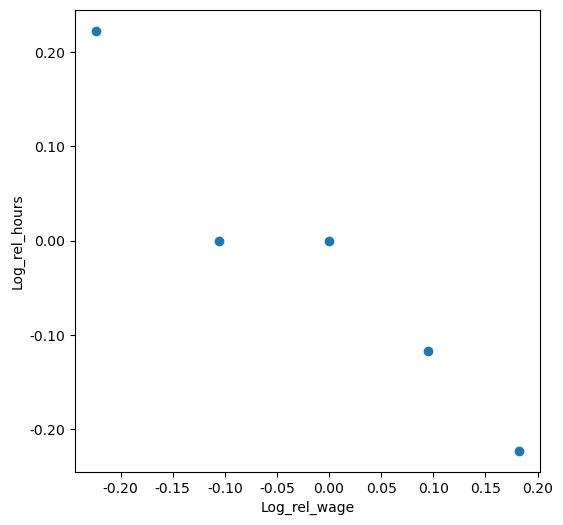

In [34]:
fig,ax = plt.subplots(figsize=(6,6))

from matplotlib import ticker
ax.scatter(x=log_rel_wage_list,y=log_rel_hours_list)
ax.set(xlabel="Log_rel_wage",ylabel="Log_rel_hours")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))

Explain your code and procedure

In [6]:

model.par.alpha = 0.5
model.par.sigma = 1

In [7]:
print(model.par.sigma)

1


# Question 3

In [38]:
kont = model.solve_continuous()

In [39]:
model.par

namespace(rho=2.0,
          nu=0.001,
          epsilon=1.0,
          omega=0.5,
          alpha=0.5,
          sigma=1,
          wM=1.0,
          wF=1.0,
          wF_vec=array([0.8, 0.9, 1. , 1.1, 1.2]),
          beta0_target=0.4,
          beta1_target=-0.1)

In [40]:
print(kont)

namespace(LM=4.460187809599635, HM=4.4601878082167845, LF=4.460187815437109, HF=4.460187817825634)


In [43]:
# Using the model to calculate optimal HF and HM
model_cont = HouseholdClass()

par = model_cont.par

output=[]
# Looping over wF values
for wage in par.wF_vec:
    
    # Setting value
    par.wF = wage

    # Solving for discrete optimal choice
    optimum = model_cont.solve_continuous()

    # Creating Ratio 
    rel_hours_cont = optimum.HF/optimum.HM
    log_rel_hours_cont = np.log(rel_hours_cont)

    log_rel_wage = np.log(par.wF_vec)

    #list append
    output = np.append(output, log_rel_hours_cont)

    print(f'rel_hours_cont = {rel_hours_cont:.3f}     log_rel_hours_cont = {log_rel_hours_cont:.3f}     wF = {wage:.3f}   HF = {optimum.HF:.3f}   HM = {optimum.HM:.3f}   wM = {par.wM:.3f}')



print(output)

print(log_rel_wage)

rel_hours_cont = 1.253     log_rel_hours_cont = 0.225     wF = 0.800   HF = 5.064   HM = 4.043   wM = 1.000
rel_hours_cont = 1.000     log_rel_hours_cont = 0.000     wF = 0.900   HF = 4.492   HM = 4.492   wM = 1.000
rel_hours_cont = 1.000     log_rel_hours_cont = 0.000     wF = 1.000   HF = 4.460   HM = 4.460   wM = 1.000
rel_hours_cont = 1.000     log_rel_hours_cont = -0.000     wF = 1.100   HF = 4.418   HM = 4.418   wM = 1.000
rel_hours_cont = 0.830     log_rel_hours_cont = -0.187     wF = 1.200   HF = 3.990   HM = 4.809   wM = 1.000
[ 2.25200600e-01  9.75472906e-05  2.15435980e-09 -8.68013145e-05
 -1.86626835e-01]
[-0.22314355 -0.10536052  0.          0.09531018  0.18232156]


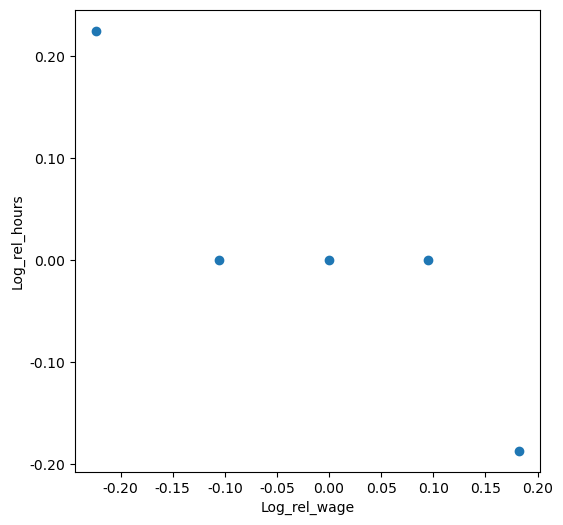

In [42]:
fig,ax = plt.subplots(figsize=(6,6))

from matplotlib import ticker
ax.scatter(x=log_rel_wage,y=output)
ax.set(xlabel="Log_rel_wage",ylabel="Log_rel_hours")
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter("{x:.2f}"))

# Question 4


In [ ]:
model4 = HouseholdClass()
model4.run_regression()

# Question 5

ADD CONCISE CONLUSION.